**NATURAL LANGUAGE PROSESSING [ NLP ]**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# NATURAL LANGUAGE PROCESSING
# SHORT EXAMPLE 
# SPAM LIST of TEXT
s = ['Congrats. You have won lottery and you can get lottery money by calling lottery number.',
    'Give your bank account details to claim lottery.',
     'lottery for sure if bank account details are verified.']

print(type(s))

<class 'list'>


In [ ]:
# tokenization - splitting of data into smaller elements (by passing index)

print(s[0].split())
print('\n')
print(s[1].split())
print('\n')
print(s[2].split())
print('\n')

['Congrats.', 'You', 'have', 'won', 'lottery', 'and', 'you', 'can', 'get', 'lottery', 'money', 'by', 'calling', 'lottery', 'number.']


['Give', 'your', 'bank', 'account', 'details', 'to', 'claim', 'lottery.']


['lottery', 'for', 'sure', 'if', 'bank', 'account', 'details', 'are', 'verified.']




**COUNT VECTORISER**

In [ ]:
# applying count vectorizer / bag of words technique
# count vectorizer is a feature extraction technique 
# Feature extraction refers to the process of transforming raw data into numerical features 
# that can be processed while preserving the information in the original data set. 
# It yields better results than applying machine learning directly to the raw data.

In [ ]:
# IMPORTING CountVectorizer
# stop_words = 'english' ==> stop words

from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer(stop_words = 'english')

In [ ]:
# appyling the count vectorizer to set(s)
# vect.fit_transform(s).toarray() ==> set to array

output = vect.fit_transform(s).toarray()  
output

array([[0, 0, 1, 0, 1, 0, 3, 1, 1, 0, 0, 1],
       [1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0]])

In [ ]:
# create a dataframe and name the columns with each unique token (using stopwords)

import pandas as pd 
df = pd.DataFrame(output,columns = vect.get_feature_names()) 
df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,account,bank,calling,claim,congrats,details,lottery,money,number,sure,verified,won
0,0,0,1,0,1,0,3,1,1,0,0,1
1,1,1,0,1,0,1,1,0,0,0,0,0
2,1,1,0,0,0,1,1,0,0,1,1,0


In [ ]:
# https://www.kaggle.com/karthickveerakumar/spam-filter
df_main = pd.read_csv('/content/emails.csv')
df_main

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [ ]:
# remove all duplicate emails from the dataframe

df_main = df_main.drop_duplicates(keep = 'last') 
df_main

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [ ]:
# default ==> 0 - CORRECT MAIL , 1 - SPAM MAIL
# SOME EXAMPLES FROM df_main
print(df_main['text'][4500])
print(df_main['spam'][4500])
print('\n')
print(df_main['text'][2344])
print(df_main['spam'][2344])
print('\n')
print(df_main['text'][34])
print(df_main['spam'][34])
print('\n')

Subject: the latest ( last ? )  . . sorry . . . i found something else :  p . 1 , footnote : the newspaper is the " houston chronicle " ( purchased the  ' post ' several years ago ) . . : - )  - - - - - forwarded by christie patrick / hou / ect on 02 / 07 / 2001 05 : 34 pm - - - - -  christie patrick  02 / 07 / 2001 05 : 27 pm  to : mark palmer / corp / enron @ enron  cc : vince j kaminski / hou / ect @ ect , j _ martin @ baylor . edu  subject : the latest ( last ? )  . . as columbo would say . . " . . just one more thing "  p . 20 last bullet : enron focusing on recruiting and retaining talent  thanks again ! christie .  - - - - - forwarded by christie patrick / hou / ect on 02 / 07 / 2001 05 : 24 pm - - - - -  christie patrick  02 / 07 / 2001 05 : 23 pm  to : mark palmer / corp / enron @ enron  cc : vince j kaminski / hou / ect @ ect , j _ martin @ baylor . edu  subject : the latest ( last ? )  mark !  please review the attached article and forward your comments / authorization  for 

In [ ]:
df_main['spam'].value_counts()

0    4327
1    1368
Name: spam, dtype: int64

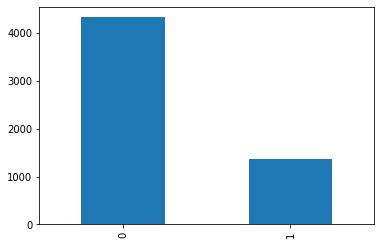

In [ ]:
df_main['spam'].value_counts().plot(kind='bar')

In [ ]:
df_main.shape

(5695, 2)

In [ ]:
x = df_main['text'].values
y = df_main['spam'].values

In [ ]:
# SPLITTING - TRAINING , TESTING

from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(4271,)
(1424,)


**CountVectorizer**

In [ ]:
# IMPORTING and FITTING

from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer(stop_words='english')
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test) 

In [ ]:
x_train_vect

<4271x32101 sparse matrix of type '<class 'numpy.int64'>'
	with 378340 stored elements in Compressed Sparse Row format>

In [ ]:
# all the text is converted to numerical values

x_train_vect.toarray() 

array([[3, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**METHOD - 1: SUPPORT VECTOR CLASSIFIER**

In [ ]:
#METHOD 1
# from support vector machines(SVM) import support vector classifier(SVC)
# FIITING THE MODEL WITH algorithm i.e., SUPPORT VECTOR CLASSIFIER
from sklearn.svm import SVC 
model = SVC()
model.fit(x_train_vect,y_train)

SVC()

In [ ]:
y_pred = model.predict(x_test_vect)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
# ACCURACY SCORE

from sklearn.metrics import accuracy_score 
accuracy_score(y_pred,y_test)

0.9740168539325843

**METHOD - 2: PIPELINES**

In [ ]:
# METHOD 2 - using pipelines 
# pipeline is used to combine multiple estimators/ combine two processes together

# SVC + countvectorizer ==> PIPELINES (present)
# if we use the pipeline we need not transform the values manually, pipelines take care of this 

In [ ]:
from sklearn.pipeline import make_pipeline 
model_2 = make_pipeline(CountVectorizer(),SVC())

model_2.fit(x_train,y_train)
y_pred2 = model_2.predict(x_test)
y_pred2

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_pred2,y_test)

0.9515449438202247

**METHOD - 3 :NAIVE BAYES**

In [ ]:
# IMPORTING & FITTING NAIVE BAYES

from sklearn.naive_bayes import MultinomialNB
model_3 = MultinomialNB()
model_3.fit(x_train_vect,y_train)

MultinomialNB()

In [ ]:
y_pred3 = model_3.predict(x_test_vect)
y_pred3

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_pred3,y_test)

0.9901685393258427

**METHOD - 4: CountVectoriser +  NAIVE BAYES**

In [ ]:
#METHOD-4 : NB + Countvectorizer pipeline
#Naive Bayes + countvectorizer ==> PIPELINES (present)

In [ ]:
# IMPORTING & FITTING & GIVING PIPELINE

from sklearn.pipeline import make_pipeline 
model_4 = make_pipeline(CountVectorizer(),MultinomialNB())

model_4.fit(x_train,y_train)
y_pred4 = model_4.predict(x_test)
y_pred4

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_pred4,y_test)

0.9901685393258427

In [ ]:
# accuracy score - 0.9740  (SVC)
# accuracy score - 0.9515  (SVC + CountVectoriser = pipeline)
# accuracy score - 0.9901685393258427 (MultinomialNB)
# accuracy score - 0.9901685393258427  (MultinomialNB + CountVectoriser = pipeline) 

**WEB APPLICATION**

In [ ]:
# WEBAPP using this model_4 
# Entered text is spam or not based on 0 or 1

In [ ]:
# IMPORTING 'joblib' & CREATING FILE 'spam-email' with model_4

import joblib 
joblib.dump(model_4,'spam-email')
reload_model = joblib.load('spam-email')

In [ ]:
# EXAMPLES based on WORDS used in MAIL or TEXT
# 0 = CORRECT MAIL & 1 = SPAM MAIL
print(reload_model.predict(['hello']))
print(reload_model.predict(['free tickets']))

[0]
[1]


In [ ]:
#STREAMLIT (used to create the webapp)
!pip install streamlit --quiet 

     |████████████████████████████████| 10.1 MB 8.9 MB/s 
     |████████████████████████████████| 76 kB 4.4 MB/s 
     |████████████████████████████████| 181 kB 70.1 MB/s 
     |████████████████████████████████| 111 kB 64.7 MB/s 
     |████████████████████████████████| 4.3 MB 45.2 MB/s 
     |████████████████████████████████| 164 kB 58.3 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 130 kB 47.2 MB/s 
     |████████████████████████████████| 793 kB 56.1 MB/s 
     |████████████████████████████████| 380 kB 59.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.28 which is incompatible.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.10.0 which is incompatible.
google-colab 1.0.0 requires ipyt

In [ ]:
# FILE NAME = app.py
# EXECUTING BY TAKING 'spam-email' file
%%writefile app.py 
import streamlit as st 
import joblib 
st.title("SPAM TEXT/EMAIL CLASSIFICATION")
reload_model = joblib.load('spam-email')

# input
ip = st.text_input("Enter the email/text :")
op = reload_model.predict([ip])

# CREATING BUTTON & NAMING IT
if st.button('PREDICT'):
  st.title(op[0])

Writing app.py


In [ ]:
# to run this streamlit web application (BY GIVING 'spam-email' file)
!streamlit run app.py & npx localtunnel --port 8501
# external link using port forwarding service of localtunnel is used

2022-03-30 14:18:51.564 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.203.158.105:8501

npx: installed 22 in 4.178s
your url is: https://funny-deer-66.loca.lt
  Stopping...
^C
